In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Bidirectional
from keras.layers import Flatten,BatchNormalization,GRU
from keras.layers import Dropout,Conv1D,MaxPooling1D,LSTM
from sklearn.preprocessing import OneHotEncoder,label_binarize
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
data=pd.read_csv("emotions.csv")

In [3]:
data.shape

(2132, 2549)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


In [5]:
data.isna().sum().sum()

0

In [6]:
data['label'].value_counts()

NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: label, dtype: int64

In [7]:
data_new= pd.get_dummies(data, columns = ['label'])


In [8]:
data_new

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,1,0,0
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,0,1,0
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,0,0,1
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,0,0,1
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,0,1,0
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,0,0,1
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,1,0,0
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,1,0,0


In [9]:
X=data_new.loc[:,'# mean_0_a':'fft_749_b']
X.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,74.3,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,130.0,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,-534.0,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,-183.0,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,114.0,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60


In [10]:
y=data_new.loc[:,'label_NEGATIVE':'label_POSITIVE']
y.head()

,label_NEGATIVE,label_NEUTRAL,label_POSITIVE
0,1,0,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0


In [11]:
X=X.values
y=y.values

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [14]:
X_train.shape

(1364, 2548)

In [15]:
model=Sequential()
input_shape=(X_train.shape[1],1)

model.add(GRU(32, return_sequences=False, input_shape=input_shape))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))

model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3360      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
Total params: 4,515
Trainable params: 4,515
Non-trainabl

In [16]:
import tensorflow as tf
import tensorflow_addons as tfa

In [17]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc')]
#            tfa.metrics.F1Score(num_classes=3)]

In [18]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=METRICS)

In [19]:
history=model.fit(X_train, y_train,
          batch_size=50,
          epochs=10,  
          verbose=1,validation_data=(X_val,y_val))

Epoch 1/10
28/28 [==============================] - 37s 1s/step - loss: 1.4484 - acc: 0.3380 - auc: 0.4927 - val_loss: 1.0092 - val_acc: 0.2727 - val_auc: 0.6425
Epoch 2/10
28/28 [==============================] - 30s 1s/step - loss: 1.1338 - acc: 0.3974 - auc: 0.5866 - val_loss: 0.9078 - val_acc: 0.6276 - val_auc: 0.7913
Epoch 3/10
28/28 [==============================] - 29s 1s/step - loss: 1.0111 - acc: 0.4516 - auc: 0.6675 - val_loss: 0.8231 - val_acc: 0.6364 - val_auc: 0.8457
Epoch 4/10
28/28 [==============================] - 29s 1s/step - loss: 0.9151 - acc: 0.5418 - auc: 0.7432 - val_loss: 0.7427 - val_acc: 0.6804 - val_auc: 0.8732
Epoch 5/10
28/28 [==============================] - 31s 1s/step - loss: 0.8318 - acc: 0.5975 - auc: 0.7932 - val_loss: 0.6717 - val_acc: 0.7302 - val_auc: 0.8936
Epoch 6/10
28/28 [==============================] - 32s 1s/step - loss: 0.7769 - acc: 0.6232 - auc: 0.8219 - val_loss: 0.6142 - val_acc: 0.7478 - val_auc: 0.9056
Epoch 7/10
28/28 [==========

In [20]:
train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
print("Train Accuracy: {:.3f}%".format(train_acc * 100))

Train Accuracy: 82.771%


In [21]:
test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(test_acc * 100))

Test Accuracy: 83.138%


In [22]:
val_acc = model.evaluate(X_val, y_val, verbose=0)[1]
print("Validation Accuracy: {:.3f}%".format(val_acc * 100))

Validation Accuracy: 83.578%


In [24]:
train_scores = model.evaluate(X_train, y_train)
val_scores = model.evaluate(X_val, y_val)
test_scores = model.evaluate(X_test,y_test)

print("Training Accuracy: %.2f%%"%(train_scores[1] * 100))
print("Validation Accuracy: %.2f%%"%(val_scores[1] * 100))
print("Testing Accuracy: %.2f%%"%(test_scores[1] * 100))

14/14 [==============================] - 3s 210ms/step - loss: 0.4559 - acc: 0.8314 - auc: 0.9425
Training Accuracy: 82.77%
Validation Accuracy: 83.58%
Testing Accuracy: 83.14%


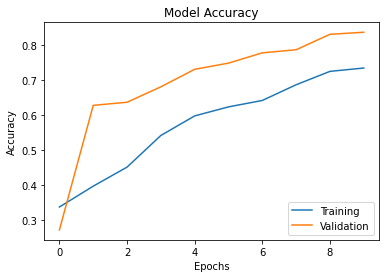

In [25]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model Accuracy.png', format='png', dpi=300)

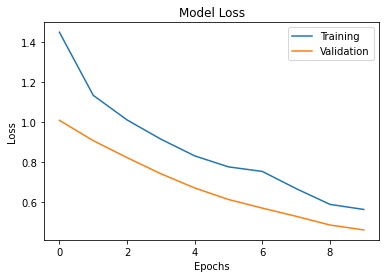

In [26]:
fig, ax = plt.subplots()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()
fig.savefig('Model Loss.png', format='png', dpi=300)

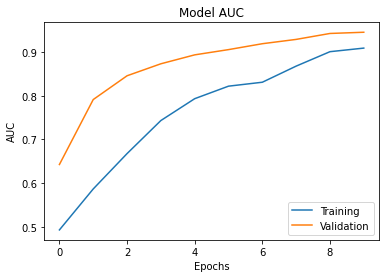

In [27]:
fig, ax = plt.subplots()
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()
fig.savefig('Model AUC.png', format='png', dpi=300)

In [28]:
y_pred=model.predict(X_test)

In [29]:
y_pred_train=model.predict(X_train)

In [30]:
y_pred_val=model.predict(X_val)

In [31]:
y_new=model.predict(X)

In [32]:
y_pred

array([[5.4170238e-04, 9.8706818e-01, 1.2390021e-02],
       [9.2760578e-04, 9.6850675e-01, 3.0565677e-02],
       [7.3430592e-01, 2.4446466e-03, 2.6324946e-01],
       ...,
       [2.6001103e-04, 9.9058706e-01, 9.1529740e-03],
       [7.3585886e-01, 2.3693927e-03, 2.6177180e-01],
       [6.4408517e-01, 9.8099019e-03, 3.4610486e-01]], dtype=float32)

In [33]:
y_test

array([[0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

In [34]:
y_test[1]

array([0, 1, 0], dtype=uint8)

In [35]:
y_pred[1]

array([9.2760578e-04, 9.6850675e-01, 3.0565677e-02], dtype=float32)

In [36]:
y_test1=np.argmax(y_test, axis=1)

In [37]:
y_test1

array([1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1,
       2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 2, 2, 1, 1, 0, 0, 2, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 2,
       2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0,

In [38]:
y_pred1=np.argmax(y_pred,axis=1)

In [39]:
y_pred1

array([1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 2, 1, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 2,
       0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 0,
       0, 2, 0, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 1, 0,

In [40]:
y_test1[4]

2

In [41]:
y_pred1[4]

2

In [42]:
confusion_matrix(y_test1,y_pred1)

array([[131,   0,  12],
       [  0, 140,   8],
       [ 44,   8,  84]], dtype=int64)

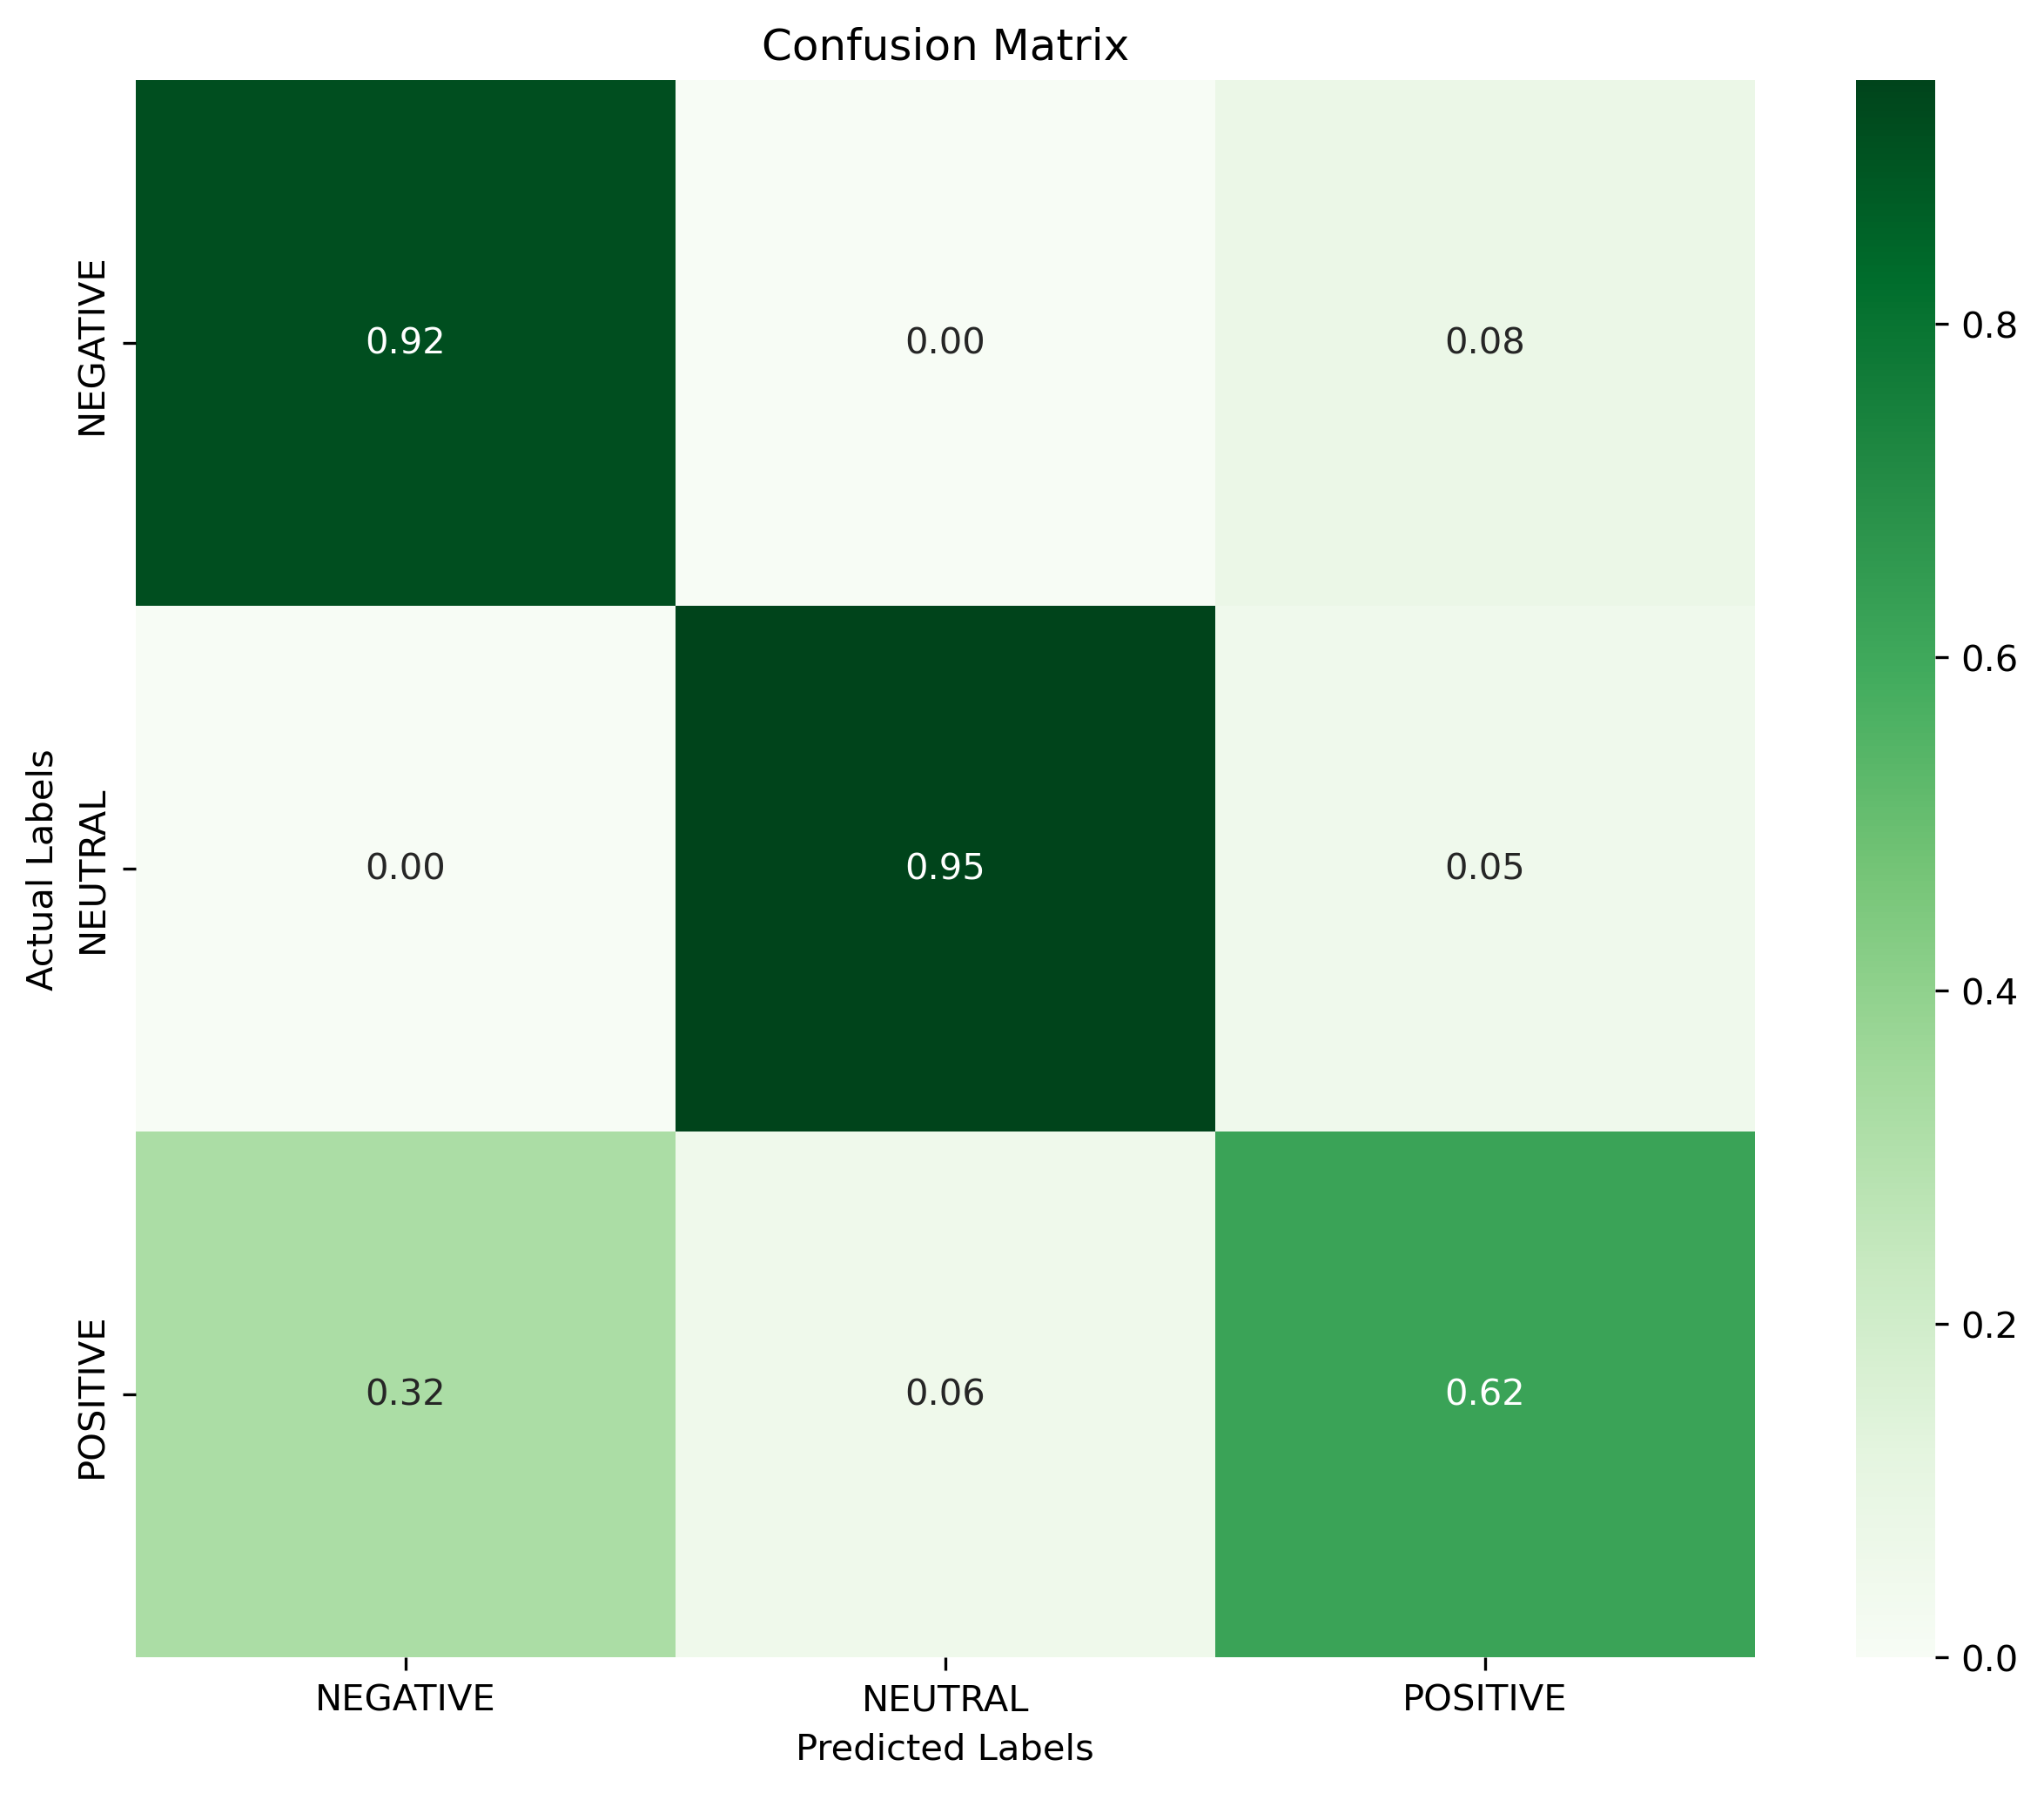

In [43]:
test= np.argmax(y_test, axis=1)
pred= np.argmax(y_pred, axis=1)
conf_matr = confusion_matrix(test, pred)

CLASSES=['NEGATIVE','NEUTRAL','POSITIVE']
cmn = conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10, 8), dpi=300)

ax=sns.heatmap(cmn, annot=True,fmt=".2f", cmap='Greens',xticklabels= CLASSES,
                yticklabels=CLASSES)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Confusion Matrix')
ax.figure.savefig('confmatrix.png',dpi=300,format='png')

In [44]:
print("classification_report\n",classification_report(y_test1,y_pred1))

classification_report
               precision    recall  f1-score   support

           0       0.75      0.92      0.82       143
           1       0.95      0.95      0.95       148
           2       0.81      0.62      0.70       136

    accuracy                           0.83       427
   macro avg       0.83      0.83      0.82       427
weighted avg       0.84      0.83      0.83       427



In [45]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test,y_pred,multi_class='ovo')

In [46]:
auc

0.9299513266080575

In [47]:
new_pred=label_binarize(y_pred1,classes=np.unique(y_pred1))
classes=np.unique(y_pred1)

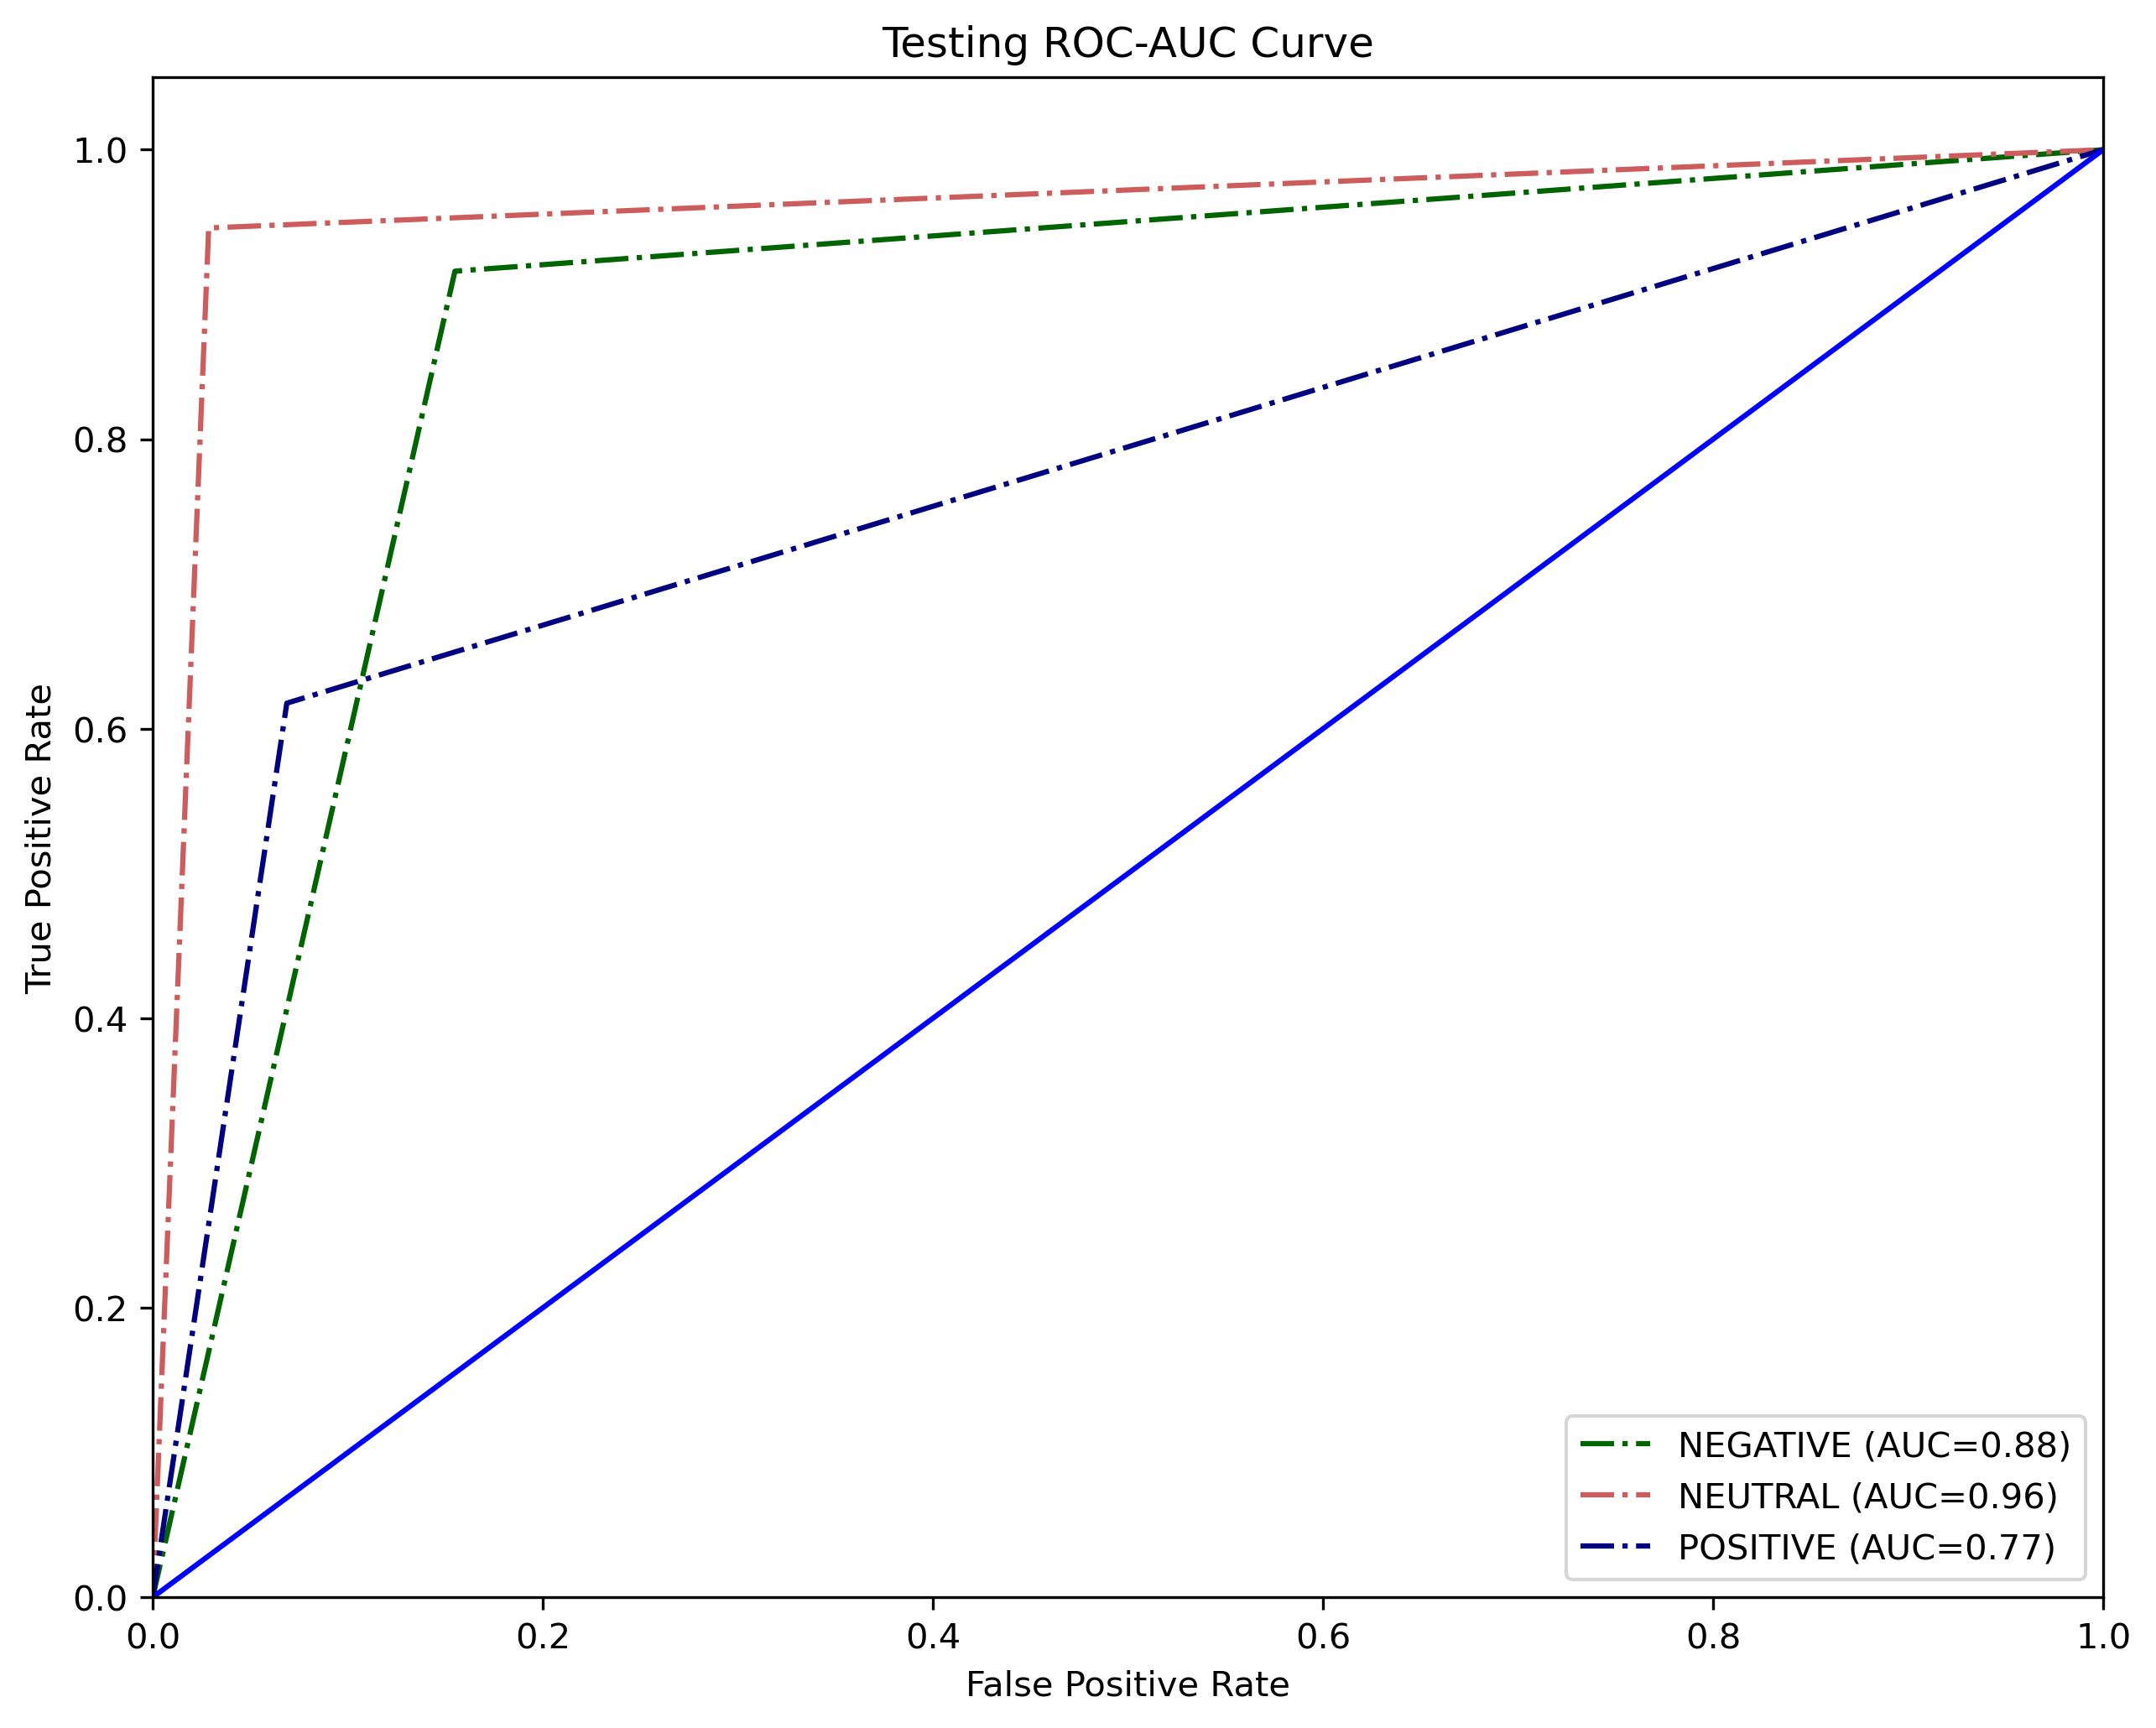

In [48]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10,8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_test[:,i],new_pred[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Testing ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Testing ROCAUC.png',dpi=300)

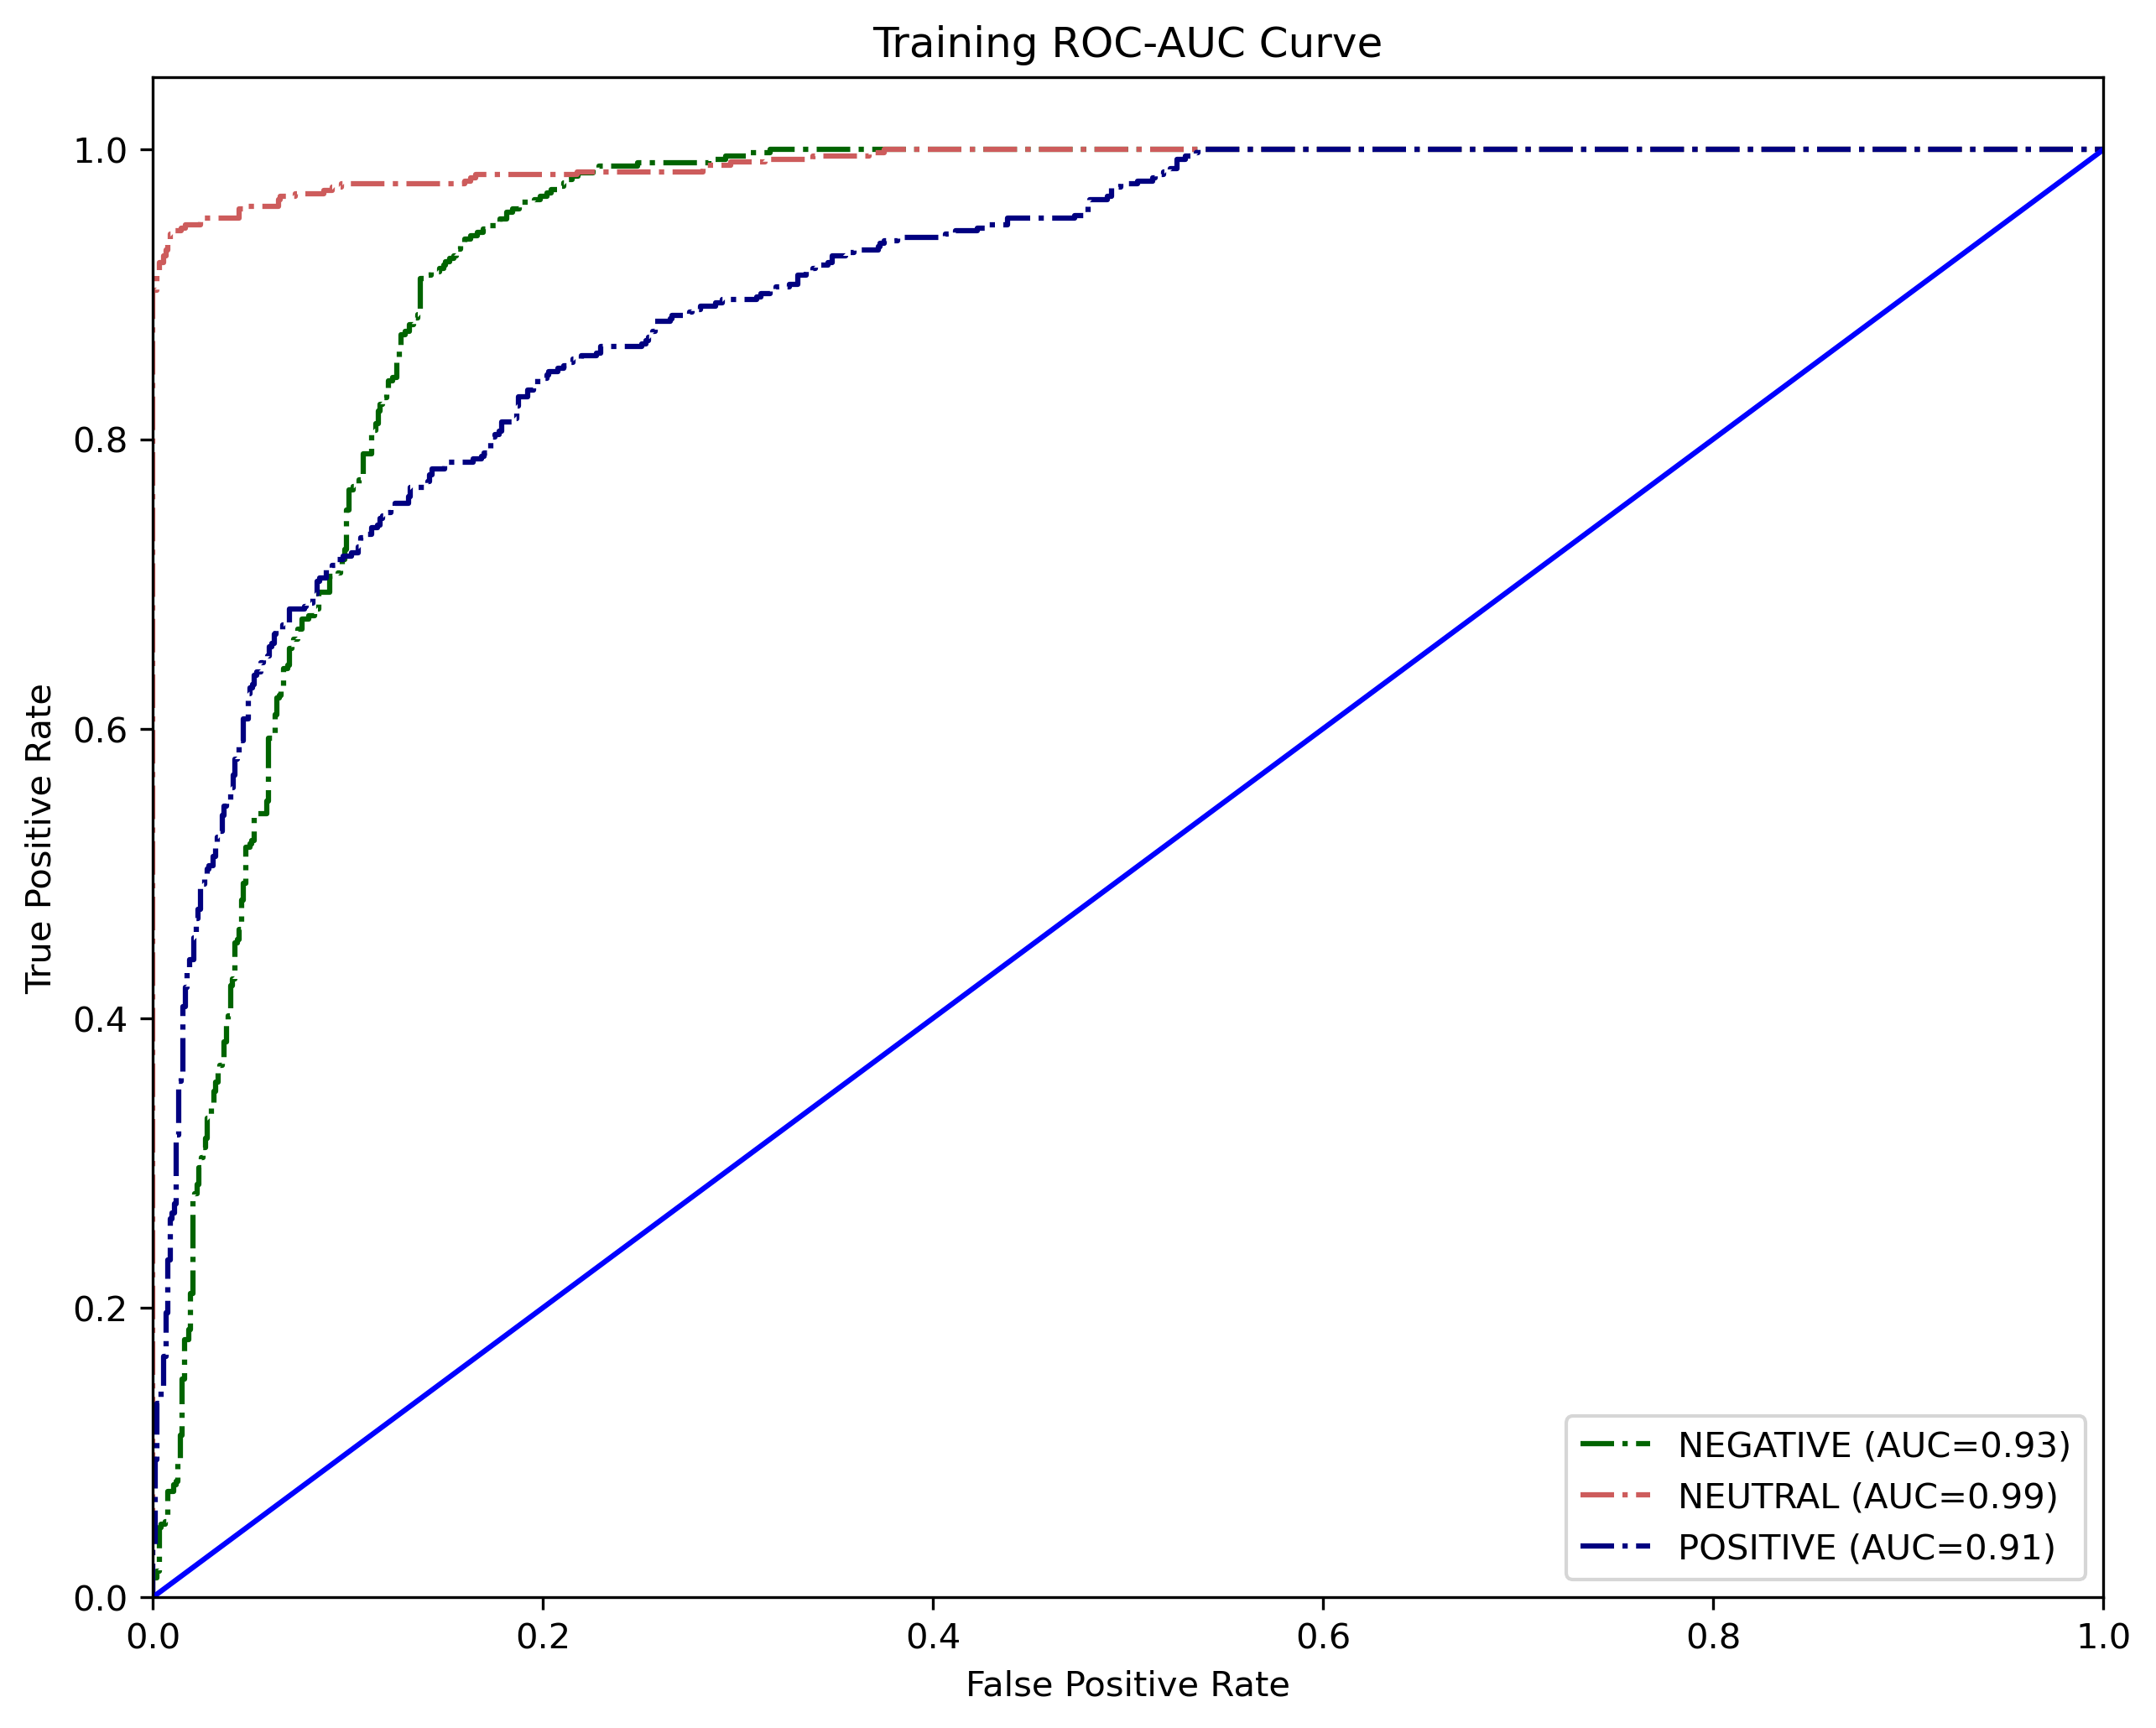

In [49]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_train[:,i],y_pred_train[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Training ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Training ROCAUC.png',dpi=300)

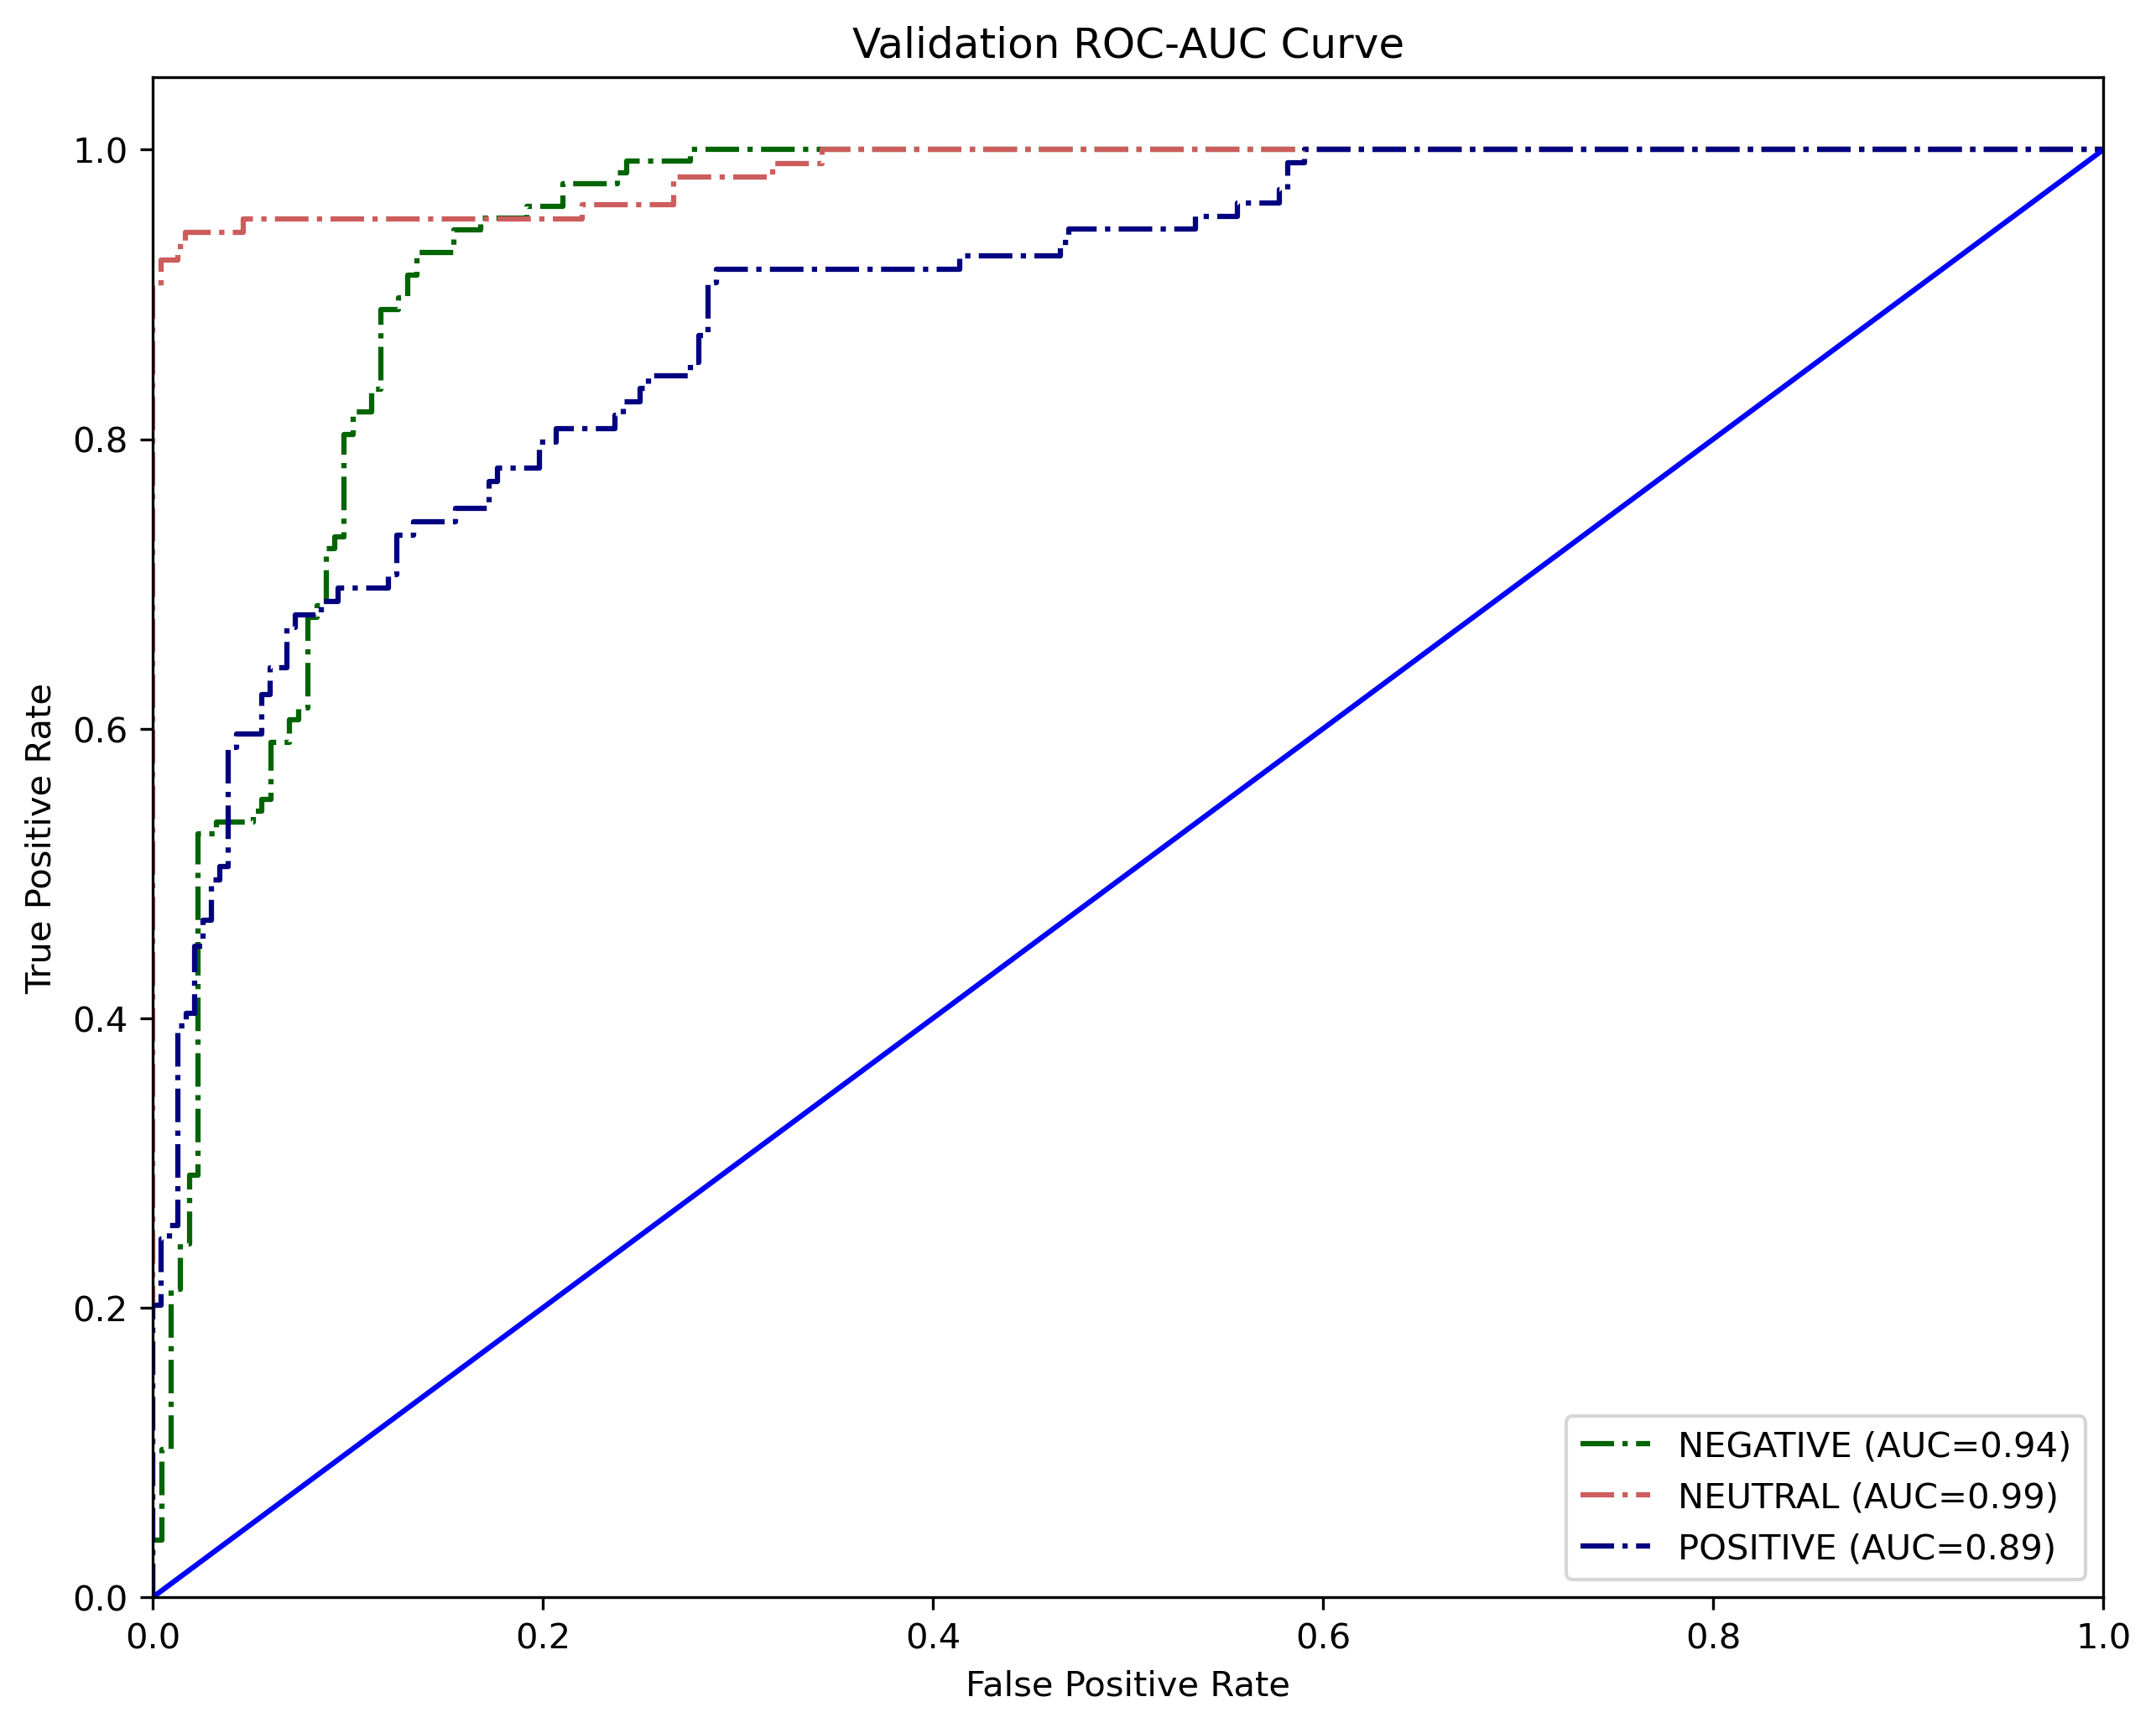

In [50]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y_val[:,i],y_pred_val[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Validation ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Validation ROCAUC.png',dpi=300)

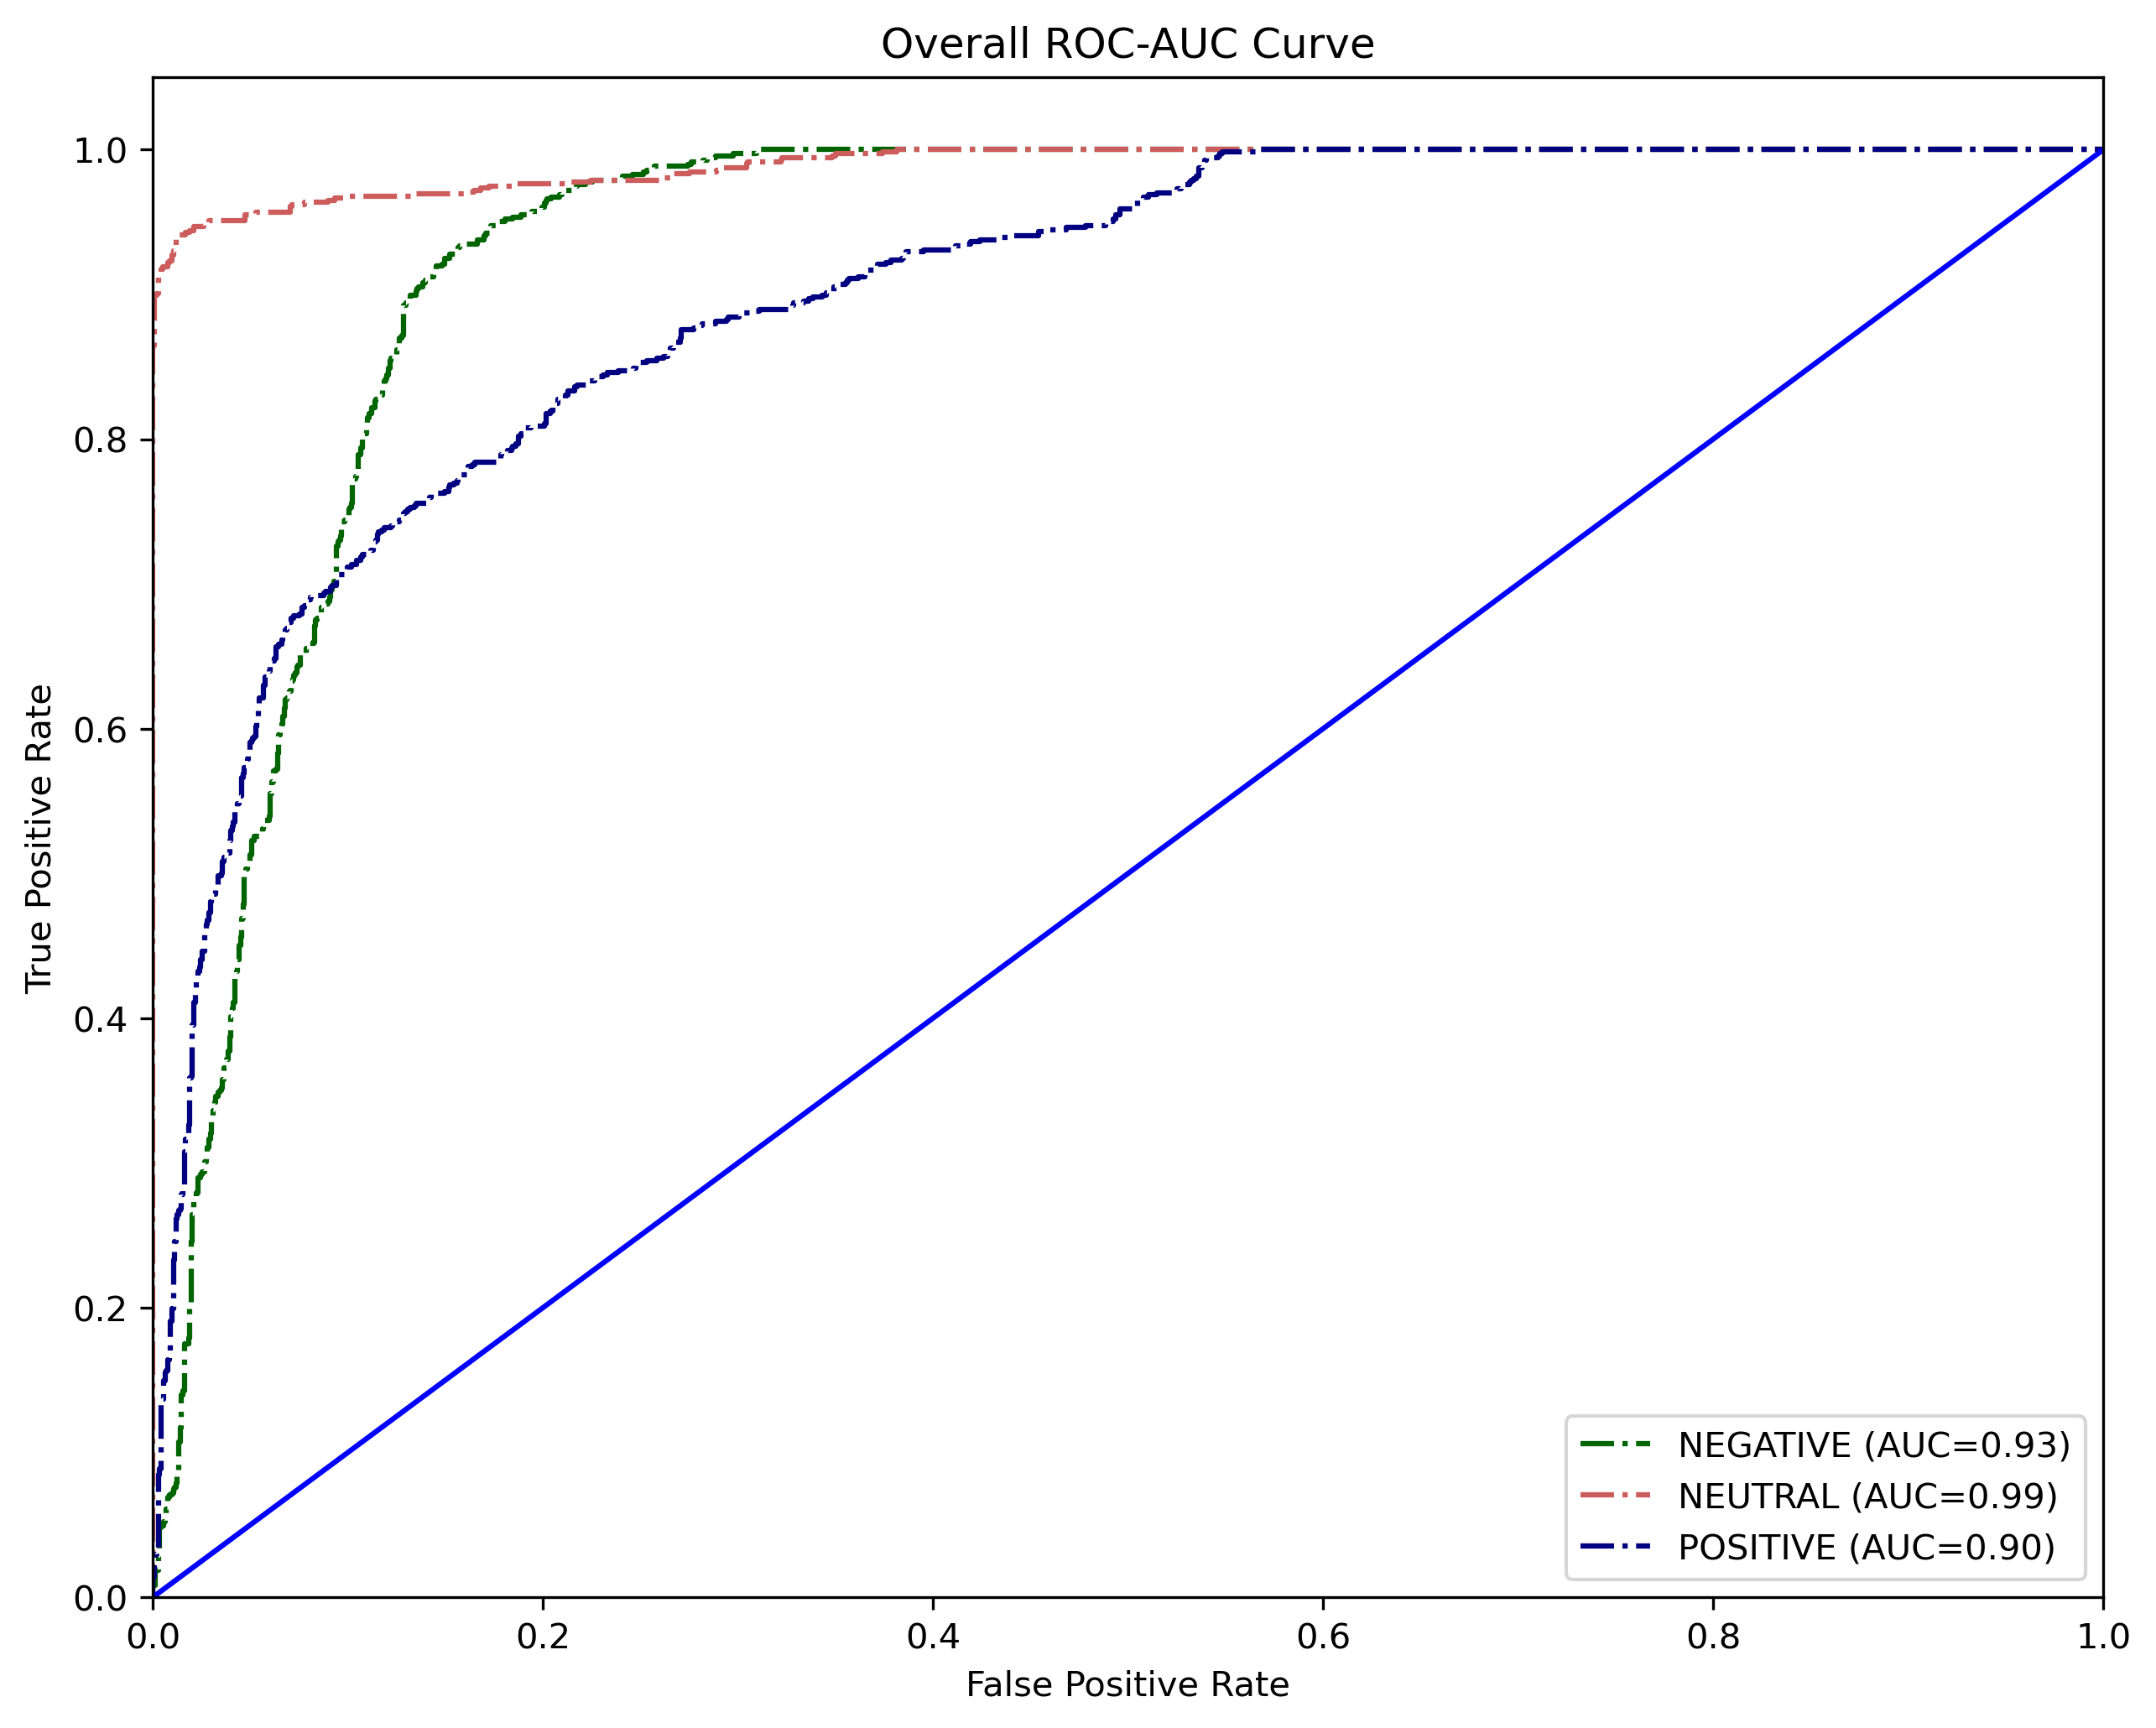

In [51]:
false_positive_rate=dict()
true_positive_rate = dict()
threshold =dict()
roc_auc_curve = dict()
no_of_classes = classes.shape[0]
fig=plt.figure(figsize=(10, 8), dpi=300)
COLORS=['darkgreen','indianred','navy']
for i in range(no_of_classes):    
    false_positive_rate[i], true_positive_rate[i], threshold[i] = metrics.roc_curve(y[:,i],y_new[:,i])
    roc_auc_curve[i] = metrics.auc(false_positive_rate[i], true_positive_rate[i])    
    if classes[i]==0:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEGATIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==1:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='NEUTRAL (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])
    if classes[i]==2:
        plt.plot(false_positive_rate[i], true_positive_rate[i], linestyle='-.',label='POSITIVE (AUC=%0.2f)'%(roc_auc_curve[i]),color=COLORS[i])

plt.plot([0,1],[0,1],'b-')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Overall ROC-AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
fig.savefig('Overall ROCAUC.png',dpi=300)